## Maria Angelica Becerra- T00054451

In [79]:
import io
import sys
PATH = '/Users/angge/Documents/BigData/'
DIR_DATA = '../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
#import plotly.express as px
from sys import getsizeof
#from plotly.offline import init_notebook_mode, iplot
#import dask.dataframe as dd
df = DIR_DATA + 'heart.csv'

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [81]:
start = time.time()
data_raw = pd.read_csv(df, sep=',', chunksize=8000000)  #Para leer por pedazos
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.0006546974182128906 sec


In [82]:
data = pd.concat(data_raw)
data.head(200)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [83]:
data.dtypes #tipos de datos

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [136]:
n = sum(1 for line in open(df))-1  # Calculate number of rows in file
s = n//10  # sample size of 10%
skip = sorted(random.sample(range(1, n+1), n-s))

In [90]:
data['trestbps'] = data['trestbps'].fillna(0.0)
data['chol'] = data['chol'].fillna(0.0)  #normalizar registros
data['thalach'] = data['thalach'].fillna('None')

In [87]:
data['age'].astype(int)
data['sex'].astype(int)
data['cp'].astype(int)
data['trestbps'].astype(int) 
data['chol'].astype(int)
data['fbs'].astype(int)
data['restecg'].astype(int)   #normalizar tipos de datos
data['thalach'].astype(int)
data['exang'].astype(int)
data['oldpeak'].astype(float)
data['slope'].astype(int)
data['ca'].astype(int)
data['thal'].astype(int)
data['target'].astype(int)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [91]:
data[{'age': ['min', 'max', 'median', 'skew']}].describe() #calculamos medidas de tendencia

,age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


In [89]:
data[{'sex': ['min', 'max', 'median', 'skew']}].describe()

,sex
count,303.000000
mean,0.683168
std,0.466011
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [93]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


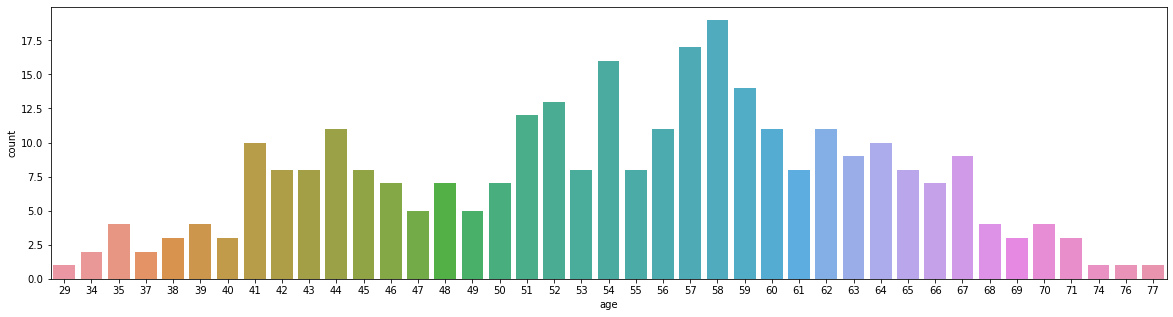

In [95]:
fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data['age']) #Analisis grafico de cada variable
plt.show()

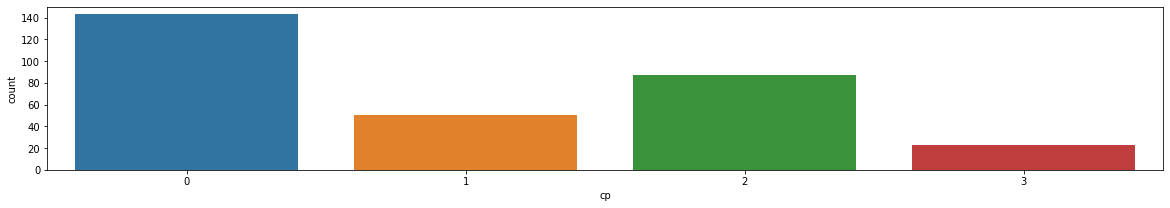

In [115]:
fig,ax = plt.subplots(figsize=(20,3))
ax = sns.countplot(data['cp'])
plt.show()

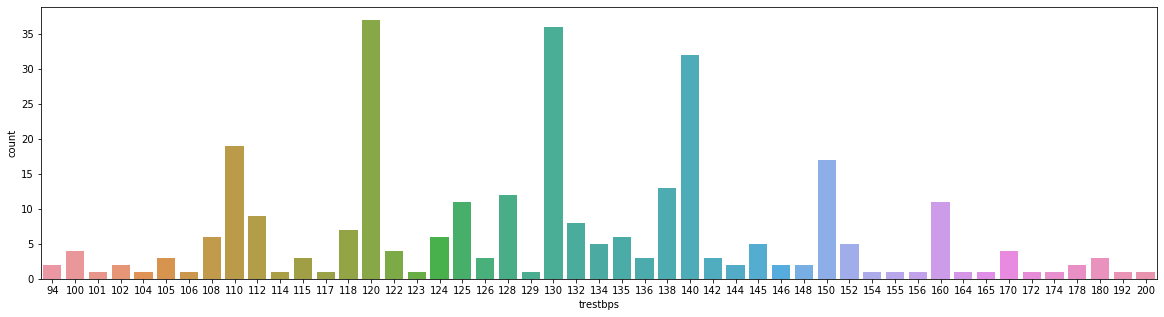

In [99]:
fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data['trestbps'])
plt.show()

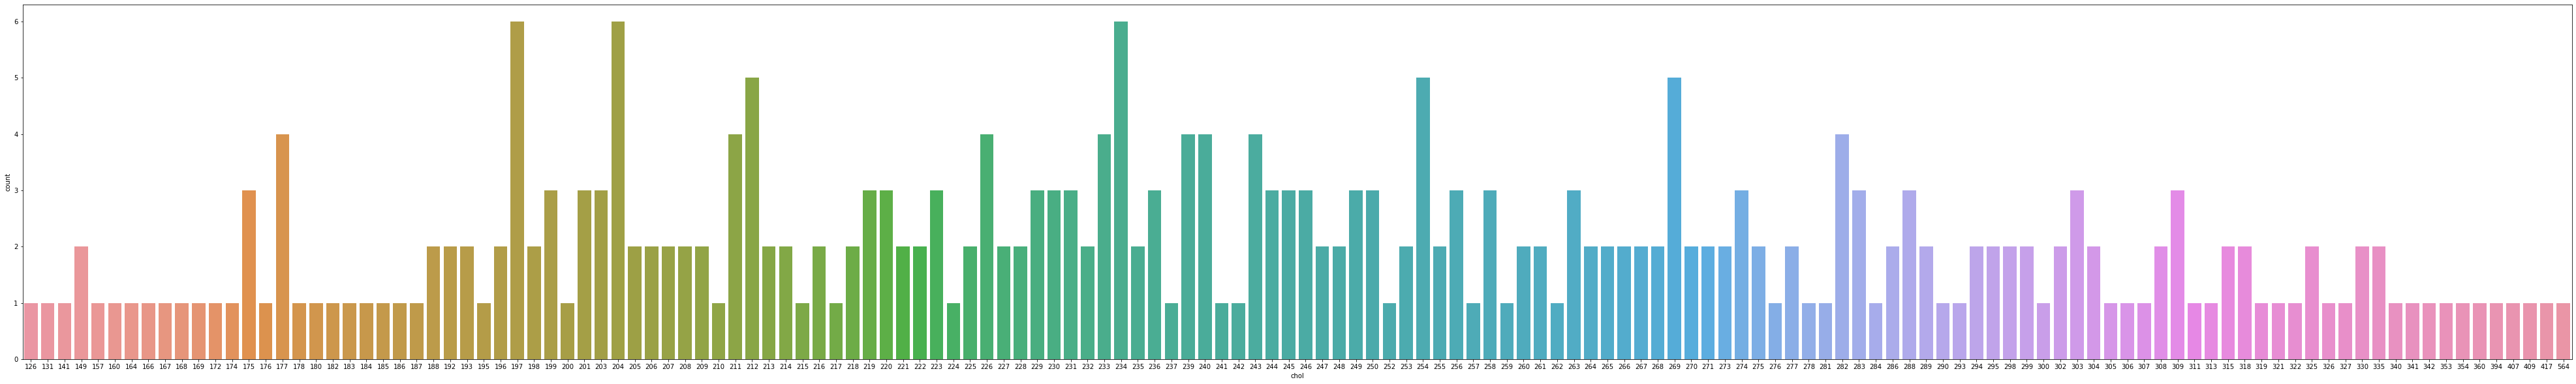

In [107]:
fig,ax = plt.subplots(figsize=(70,10))
ax = sns.countplot(data['chol'])
plt.show()

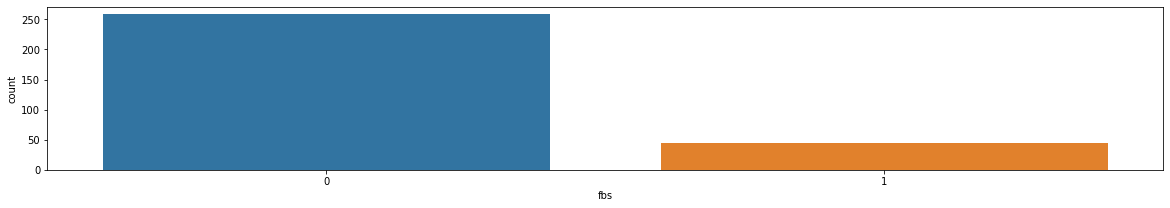

In [114]:
fig,ax = plt.subplots(figsize=(20,3))
ax = sns.countplot(data['fbs'])
plt.show()

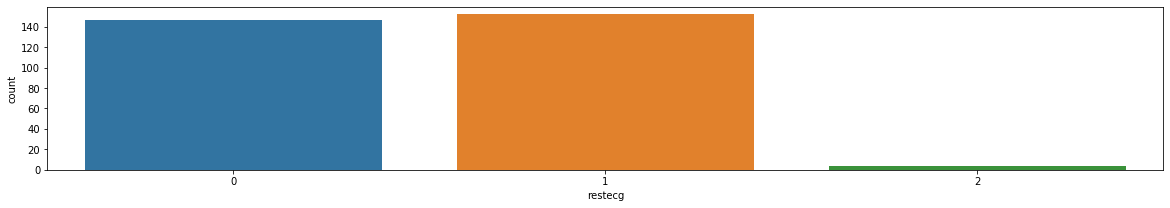

In [113]:
fig,ax = plt.subplots(figsize=(20,3))
ax = sns.countplot(data['restecg'])
plt.show()

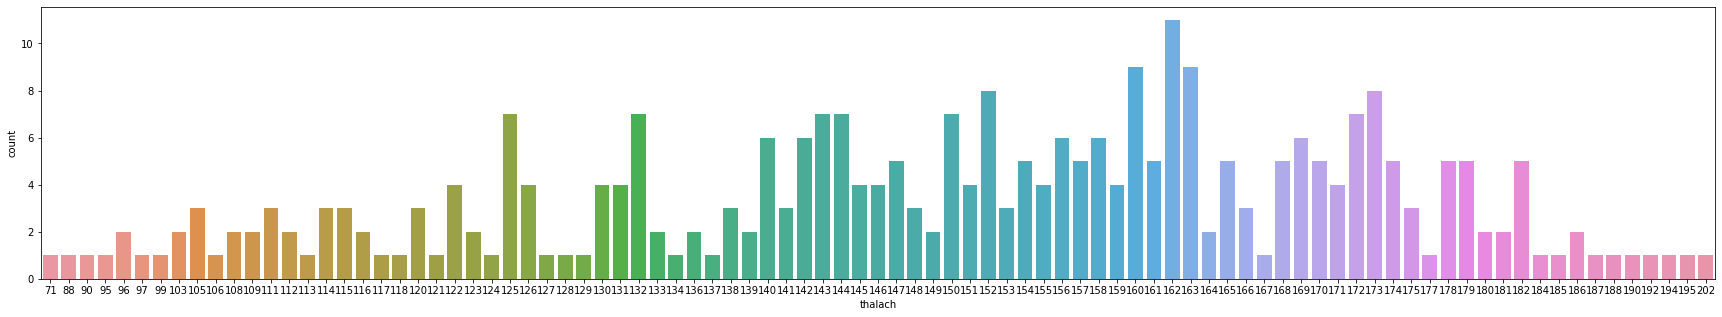

In [118]:
fig,ax = plt.subplots(figsize=(30,5))
ax = sns.countplot(data['thalach'])
plt.show()

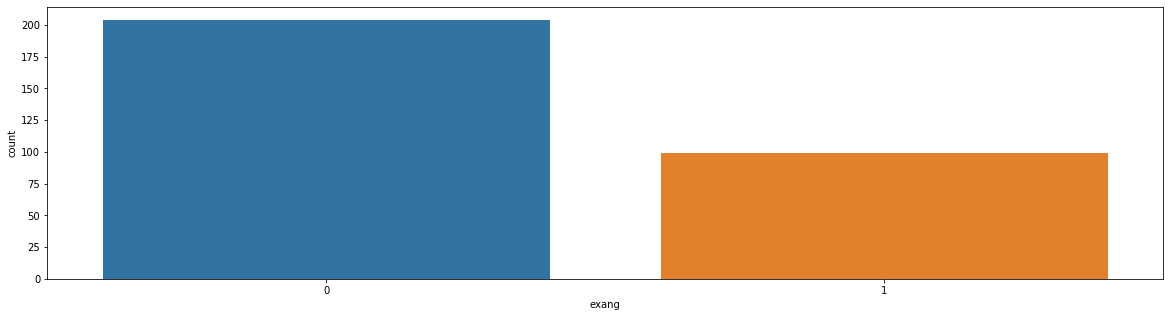

In [120]:
fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data['exang'])
plt.show()

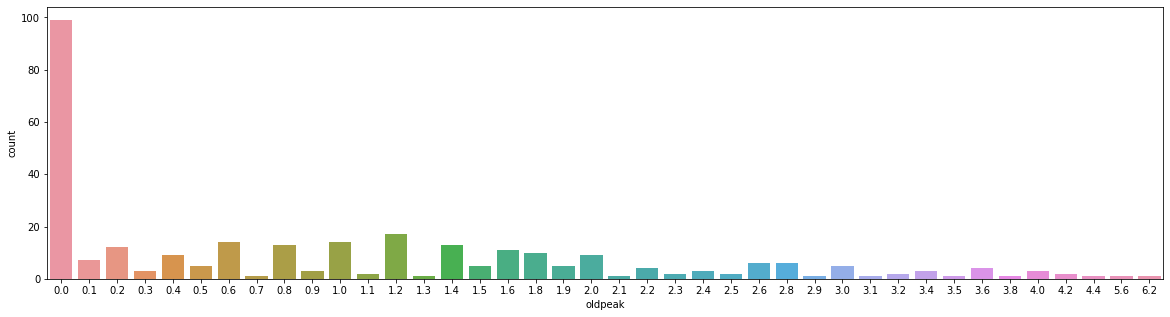

In [122]:
fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data['oldpeak'])
plt.show()

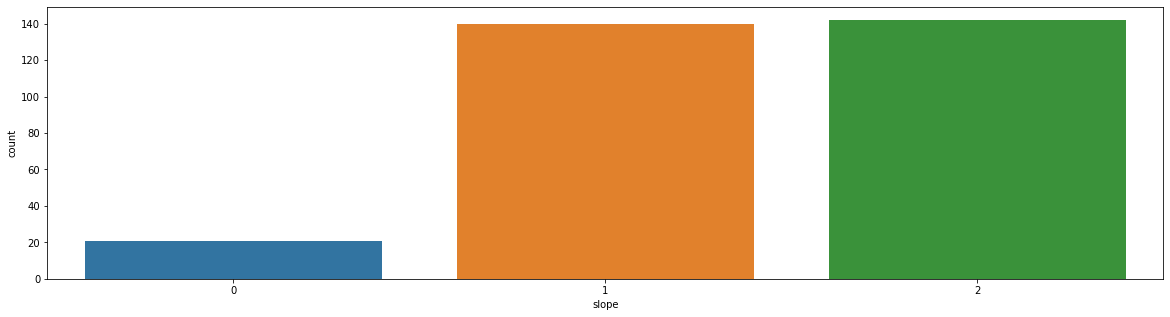

In [123]:
fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data['slope'])
plt.show()

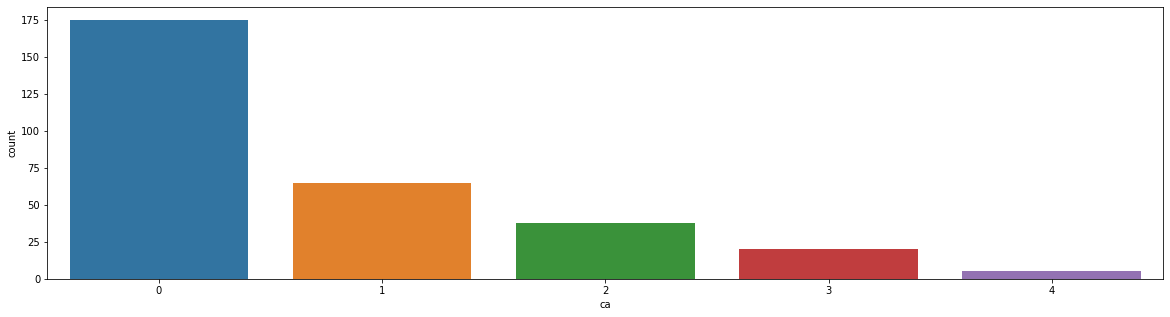

In [124]:
fig,ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(data['ca'])
plt.show()

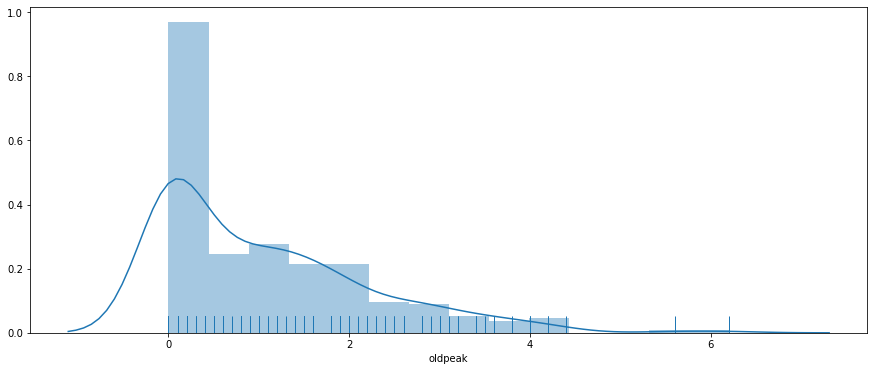

In [133]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.distplot(data['oldpeak'],rug=True)
plt.show()

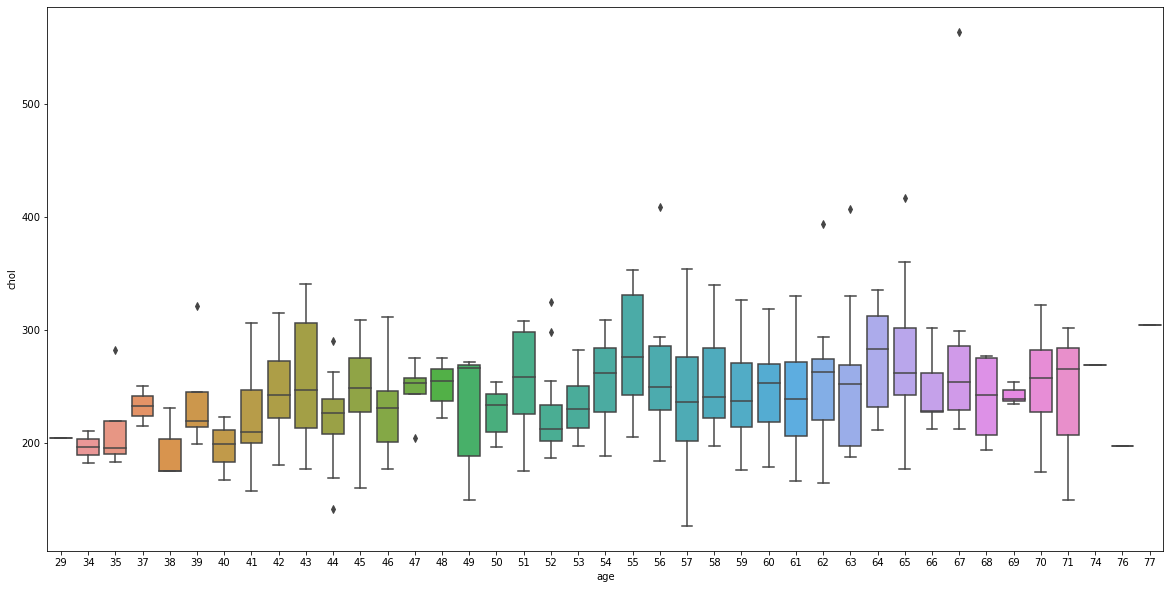

In [130]:
f,ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x='age',y='chol',data=data) #caja y bigote edad vs colesterol
plt.show()

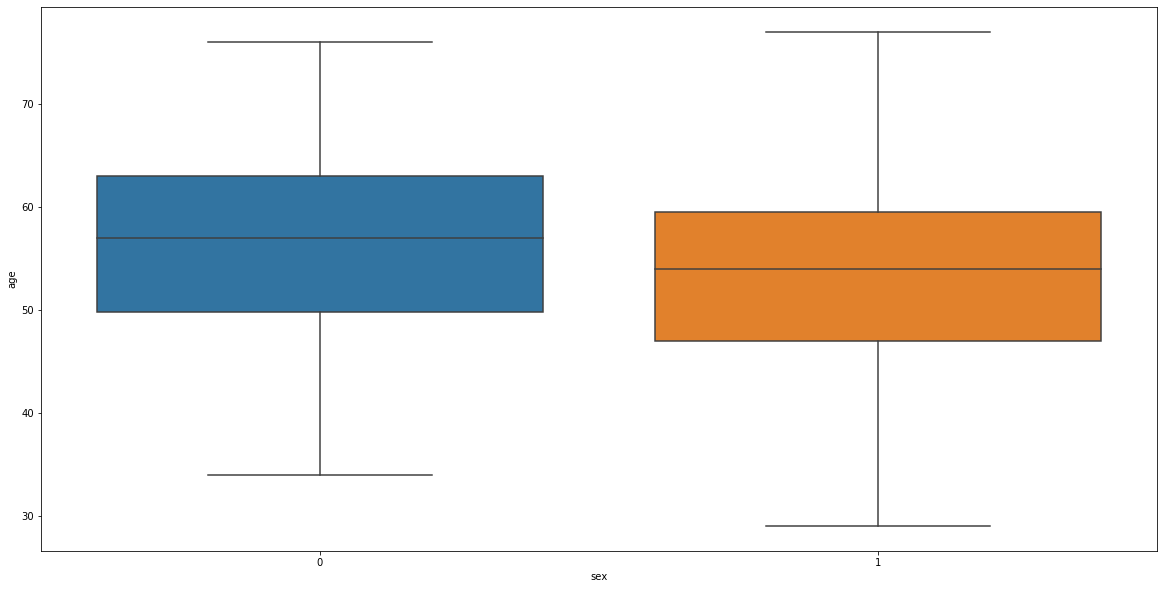

In [131]:
f,ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(x='sex',y='age',data=data) #caja y bigote sexo vs edad
plt.show()

In [143]:
data_plus = data.sample(frac=0.30, random_state=70)

In [144]:
data_plus

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1


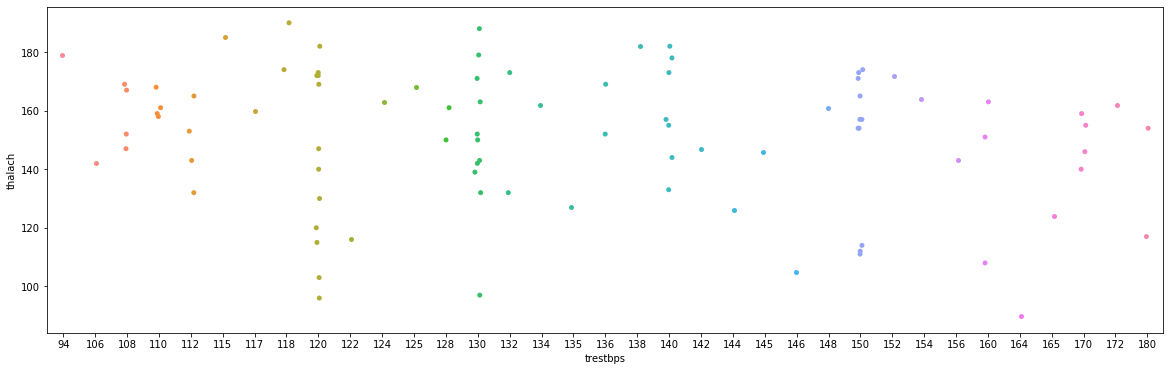

In [146]:
f, ax = plt.subplots(figsize=(20, 6))
sns.stripplot(x="trestbps", y="thalach", data=data_plus)
plt.show()